# Data Exploration of CSVs

In [36]:
import pandas as pd
import numpy as np
from glob import glob

import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [38]:
csvs = glob("*.csv")

df = pd.concat([pd.read_csv(c) for c in csvs])
df = df.drop_duplicates(subset="title")
df["publishTime"] = pd.to_datetime(df["publishTime"])

In [48]:
df["vid_missing"] = df["videoId"].isna()

In [51]:
df.groupby("channelTitle")["vid_missing"].value_counts().unstack()

vid_missing,False,True
channelTitle,,
Jimmy_Kimmel_Live,1362.0,1.0
Late_Night_with_Seth_Meyers,1377.0,1.0
The_Daily_Show_with_Trevor_Noah,NaN,1415.0
The_Late_Show_with_Stephen_Colbert,NaN,1435.0
The_Tonight_Show_Starring_Jimmy_Fallon,1216.0,2.0


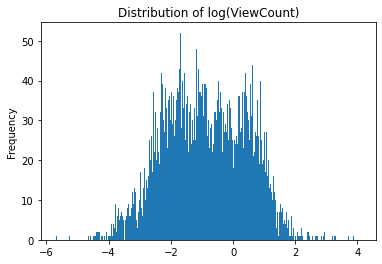

In [52]:
np.log(df["viewCountM"]).plot(
    kind="hist", bins=500, title="Distribution of log(ViewCount)"
)
plt.show()

<AxesSubplot:xlabel='channelTitle', ylabel='publish_clock_eastern'>

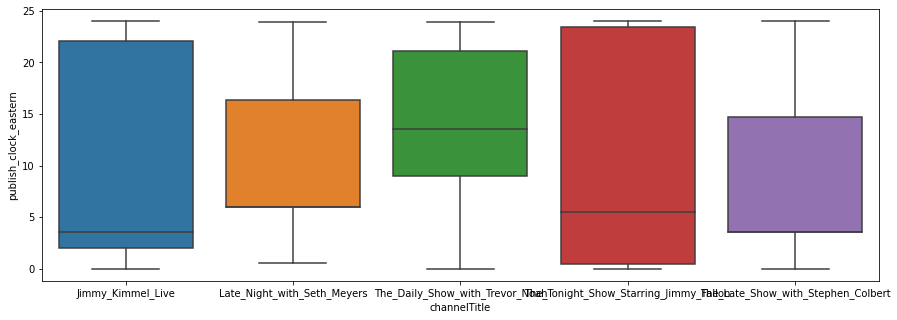

In [53]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df, x="channelTitle", y="publish_clock_eastern")

<AxesSubplot:xlabel='channelTitle', ylabel='publish_clock_eastern'>

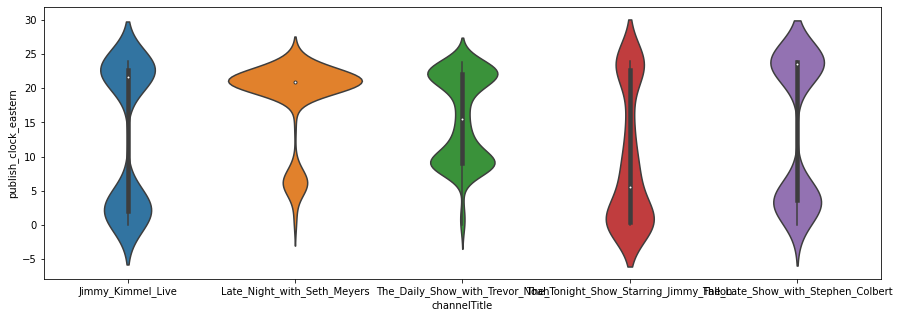

In [54]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(
    data=df.query("viewCountM > 0.75"), x="channelTitle", y="publish_clock_eastern"
)

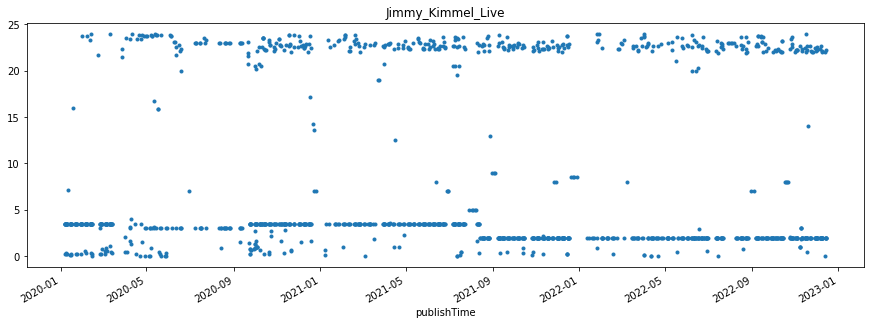

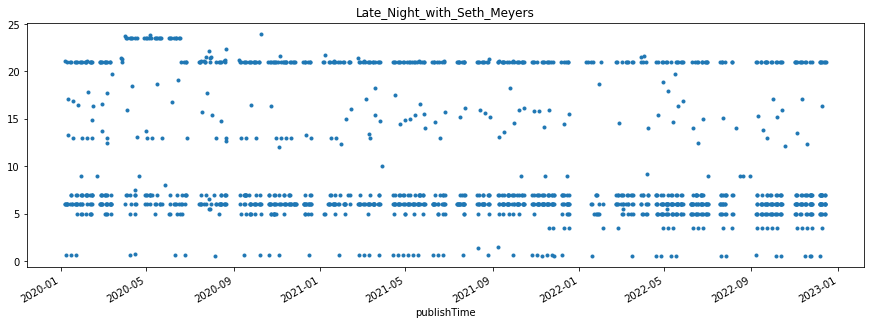

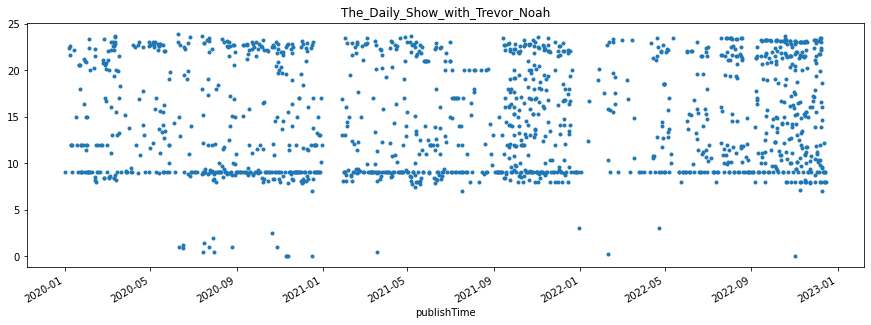

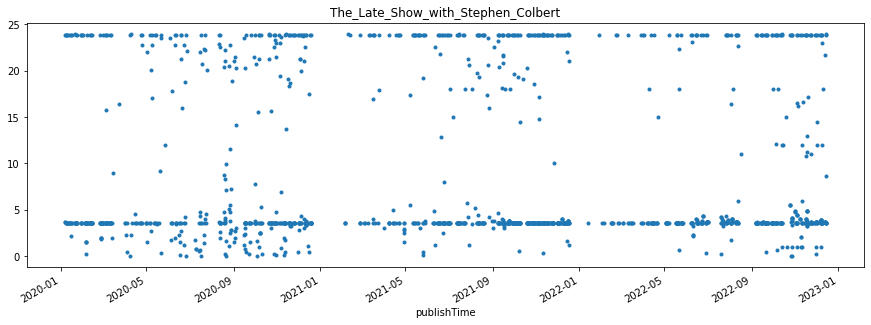

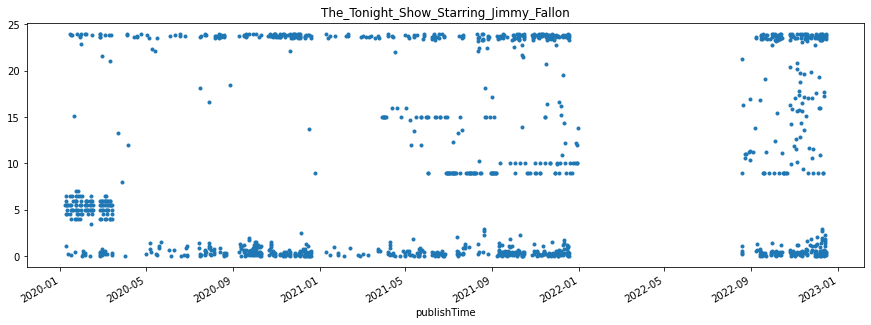

In [56]:
for i, d in df.set_index("publishTime").groupby("channelTitle"):
    fig, ax = plt.subplots(figsize=(15, 5))
    d["publish_clock_eastern"].plot(style=".", ax=ax)
    ax.set_title(i)
    # plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

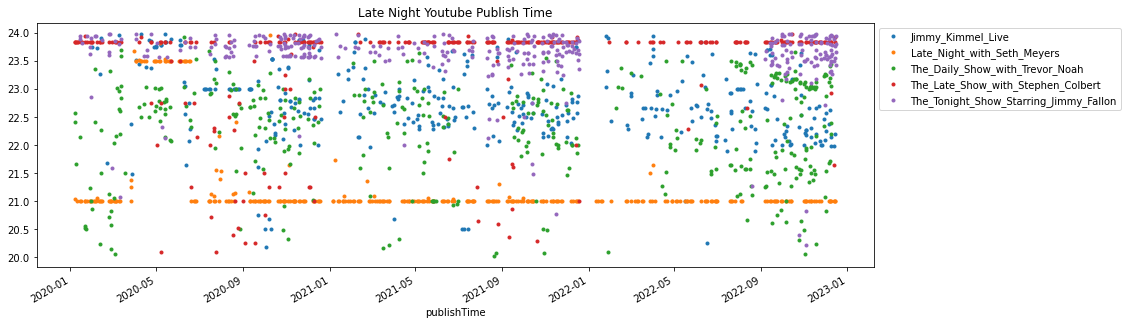

In [57]:
fig, ax = plt.subplots(figsize=(15, 5))
df.query("publish_clock_eastern > 20").set_index("publishTime").groupby("channelTitle")[
    "publish_clock_eastern"
].plot(style=".", ax=ax)
ax.set_title("Late Night Youtube Publish Time")
plt.legend(bbox_to_anchor=(1, 1))

In [58]:
df["publishTimeEastern"] = df["publishTime"].dt.tz_convert("US/Eastern")

In [59]:
df["publishDateEastern"] = df["publishTimeEastern"].dt.date

In [60]:
df_top_day = (
    df.sort_values("viewCountM", ascending=False)
    .groupby(["channelTitle", "publishDateEastern"])
    .first()
    .reset_index()
)

<AxesSubplot:xlabel='publishDateEastern'>

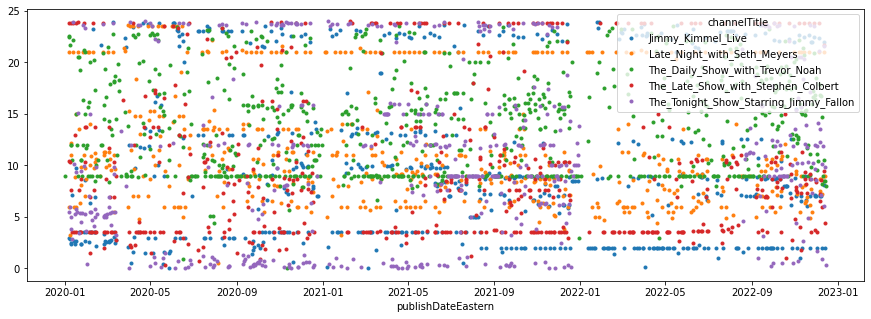

In [61]:
df.groupby(["channelTitle", "publishDateEastern"])[
    "publish_clock_eastern"
].mean().unstack().T.plot(style=".", figsize=(15, 5))

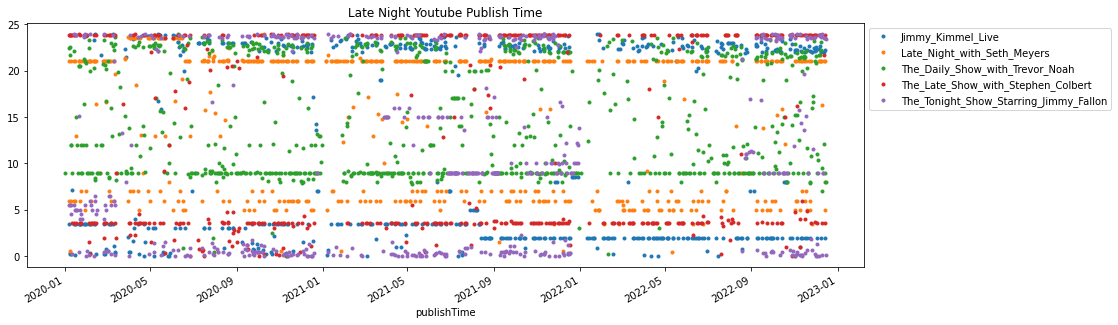

In [62]:
fig, ax = plt.subplots(figsize=(15, 5))
df_top_day.set_index("publishTime").groupby("channelTitle")[
    "publish_clock_eastern"
].plot(style=".", ax=ax)
ax.set_title("Late Night Youtube Publish Time")
plt.legend(bbox_to_anchor=(1, 1))